In [1]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('wordnet')
# nltk
import nltk

from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
# sklearn


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhavya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [3]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [4]:

processed_data = pd.read_csv('data/Preprocesswithoutstopword.csv',encoding='latin-1')


In [5]:
processed_data['sentiment'] = processed_data['sentiment'].replace(4,1)

In [6]:
text,sentiment=list(processed_data['clean_text'].values.astype('U')),list(processed_data['sentiment'])

In [7]:
for i in text:
    print(type(i))
    break;

<class 'numpy.str_'>


In [8]:
processed_data.head()

,sentiment,text,result,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",en,aww that bummer you shoulda got david carr of ...
1,0,is upset that he can't update his Facebook by ...,en,is upset that he can update his facebook by te...
2,0,@Kenichan I dived many times for the ball. Man...,en,dived many time for the ball managed to save 5...
3,0,my whole body feels itchy and like its on fire,en,my whole body feel itchy and like it on fire
4,0,"@nationwideclass no, it's not behaving at all....",en,no it not behaving at all mad why am here beca...


In [10]:
X_train, X_test, y_train, y_test = train_test_split(text, sentiment,test_size = 0.10, random_state = 0)
print(f'Data Split done.')

Data Split done.


In [13]:
vectoriser = TfidfVectorizer(ngram_range=(3,3),max_features=50000)
vectoriser.fit(X_train)

print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  50000


In [14]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [15]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(cf_matrix)
    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [12]:
# Logistic Regression

C:\Users\bhavya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bhavya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


              precision    recall  f1-score   support

           0       0.75      0.56      0.64     74642
           1       0.65      0.82      0.72     74057

    accuracy                           0.69    148699
   macro avg       0.70      0.69      0.68    148699
weighted avg       0.70      0.69      0.68    148699

[[41461 33181]
 [13473 60584]]


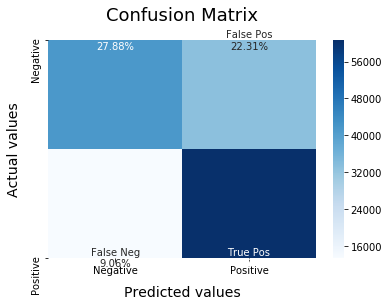

In [16]:
regressor = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
regressor.fit(X_train, y_train)
model_Evaluate(regressor)

In [14]:
# Linear Support Vector Classifier

C:\Users\bhavya\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.74      0.56      0.64     74642
           1       0.65      0.81      0.72     74057

    accuracy                           0.68    148699
   macro avg       0.70      0.68      0.68    148699
weighted avg       0.70      0.68      0.68    148699

[[41950 32692]
 [14383 59674]]


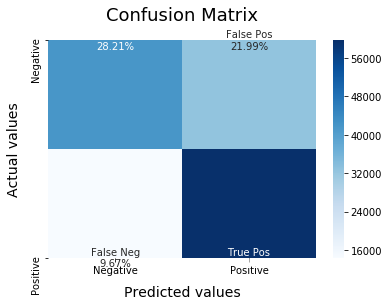

In [17]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

In [16]:
# BernoulliNB

              precision    recall  f1-score   support

           0       0.75      0.56      0.64     74642
           1       0.65      0.82      0.72     74057

    accuracy                           0.69    148699
   macro avg       0.70      0.69      0.68    148699
weighted avg       0.70      0.69      0.68    148699

[[41471 33171]
 [13547 60510]]


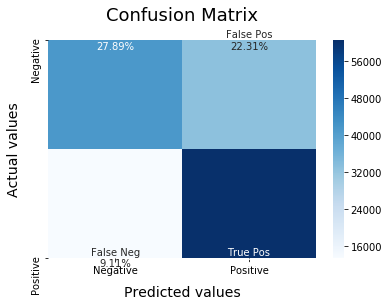

In [18]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

In [18]:
# AdaBoostClassifier

C:\Users\bhavya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bhavya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


              precision    recall  f1-score   support

           0       0.54      0.96      0.69     74642
           1       0.81      0.17      0.28     74057

    accuracy                           0.57    148699
   macro avg       0.68      0.56      0.48    148699
weighted avg       0.68      0.57      0.48    148699

[[71809  2833]
 [61670 12387]]


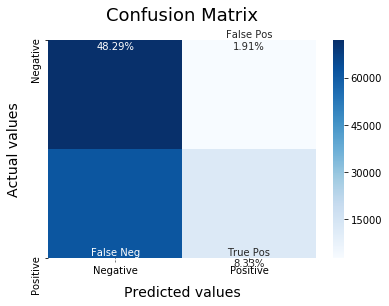

In [19]:
ac= AdaBoostClassifier(base_estimator = regressor,n_estimators=200, random_state=0)
ac.fit(X_train,y_train)
model_Evaluate(ac)

In [20]:
# RandomForest

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.6s finished


              precision    recall  f1-score   support

           0       0.53      0.97      0.69     74642
           1       0.81      0.13      0.23     74057

    accuracy                           0.55    148699
   macro avg       0.67      0.55      0.46    148699
weighted avg       0.67      0.55      0.46    148699

[[72365  2277]
 [64263  9794]]


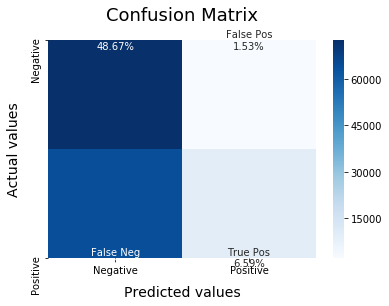

In [20]:
rf = RandomForestClassifier(max_depth=50,n_jobs=-1,n_estimators=100,verbose=1)
rf.fit(X_train,y_train)
model_Evaluate(rf)

In [22]:
# Decision Tree

              precision    recall  f1-score   support

           0       0.71      0.54      0.62     74642
           1       0.63      0.78      0.69     74057

    accuracy                           0.66    148699
   macro avg       0.67      0.66      0.65    148699
weighted avg       0.67      0.66      0.65    148699

[[40562 34080]
 [16628 57429]]


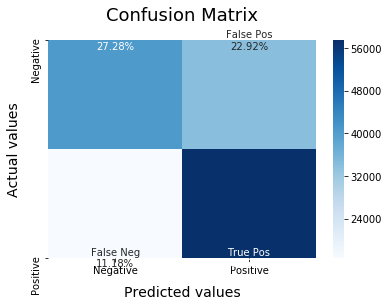

In [21]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
model_Evaluate(dt)

In [24]:
# Multi-layer Perceptron

              precision    recall  f1-score   support

           0       0.60      0.86      0.71     74642
           1       0.75      0.43      0.54     74057

    accuracy                           0.64    148699
   macro avg       0.67      0.64      0.62    148699
weighted avg       0.67      0.64      0.63    148699

[[64021 10621]
 [42513 31544]]


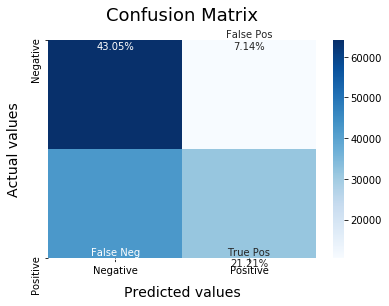

In [22]:
mlp = MLPClassifier(solver='lbfgs', alpha=2,hidden_layer_sizes=(5, 2), random_state=0)
mlp.fit(X_train, y_train)
model_Evaluate(mlp)

In [26]:
# Generating Pikle file for each model and saving


In [23]:
import pickle
file = open('output for only trigram Preprocesswithoutstopwords/vectoriser-ngram-(1,3).pickle','wb')
pickle.dump(vectoriser, file)
file.close()

file = open('output for only trigram Preprocesswithoutstopwords/Sentiment-LR-ngram-(1,3).pickle','wb')
pickle.dump(regressor, file)
file.close()

file = open('output for only trigram Preprocesswithoutstopwords/SVCmodel-ngram-(1,3).pickle','wb')
pickle.dump(SVCmodel, file)
file.close()

file = open('output for only trigram Preprocesswithoutstopwords/BNBmodel-ngram-(1,3).pickle','wb')
pickle.dump(BNBmodel, file)
file.close()

file = open('output for only trigram Preprocesswithoutstopwords/ac-ngram-(1,3).pickle','wb')
pickle.dump(ac, file)
file.close()

file = open('output for only trigram Preprocesswithoutstopwords/rf-ngram-(1,3).pickle','wb')
pickle.dump(rf, file)
file.close()

file = open('output for only trigram Preprocesswithoutstopwords/dt-ngram-(1,3).pickle','wb')
pickle.dump(dt, file)
file.close()

file = open('output for only trigram Preprocesswithoutstopwords/mlp-ngram-(1,3).pickle','wb')
pickle.dump(mlp, file)
file.close()